In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

data = pd.read_csv('dataSet\MoviesDataSet.csv')

C:\Users\santi\AppData\Local\Temp\ipykernel_13156\2250925099.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


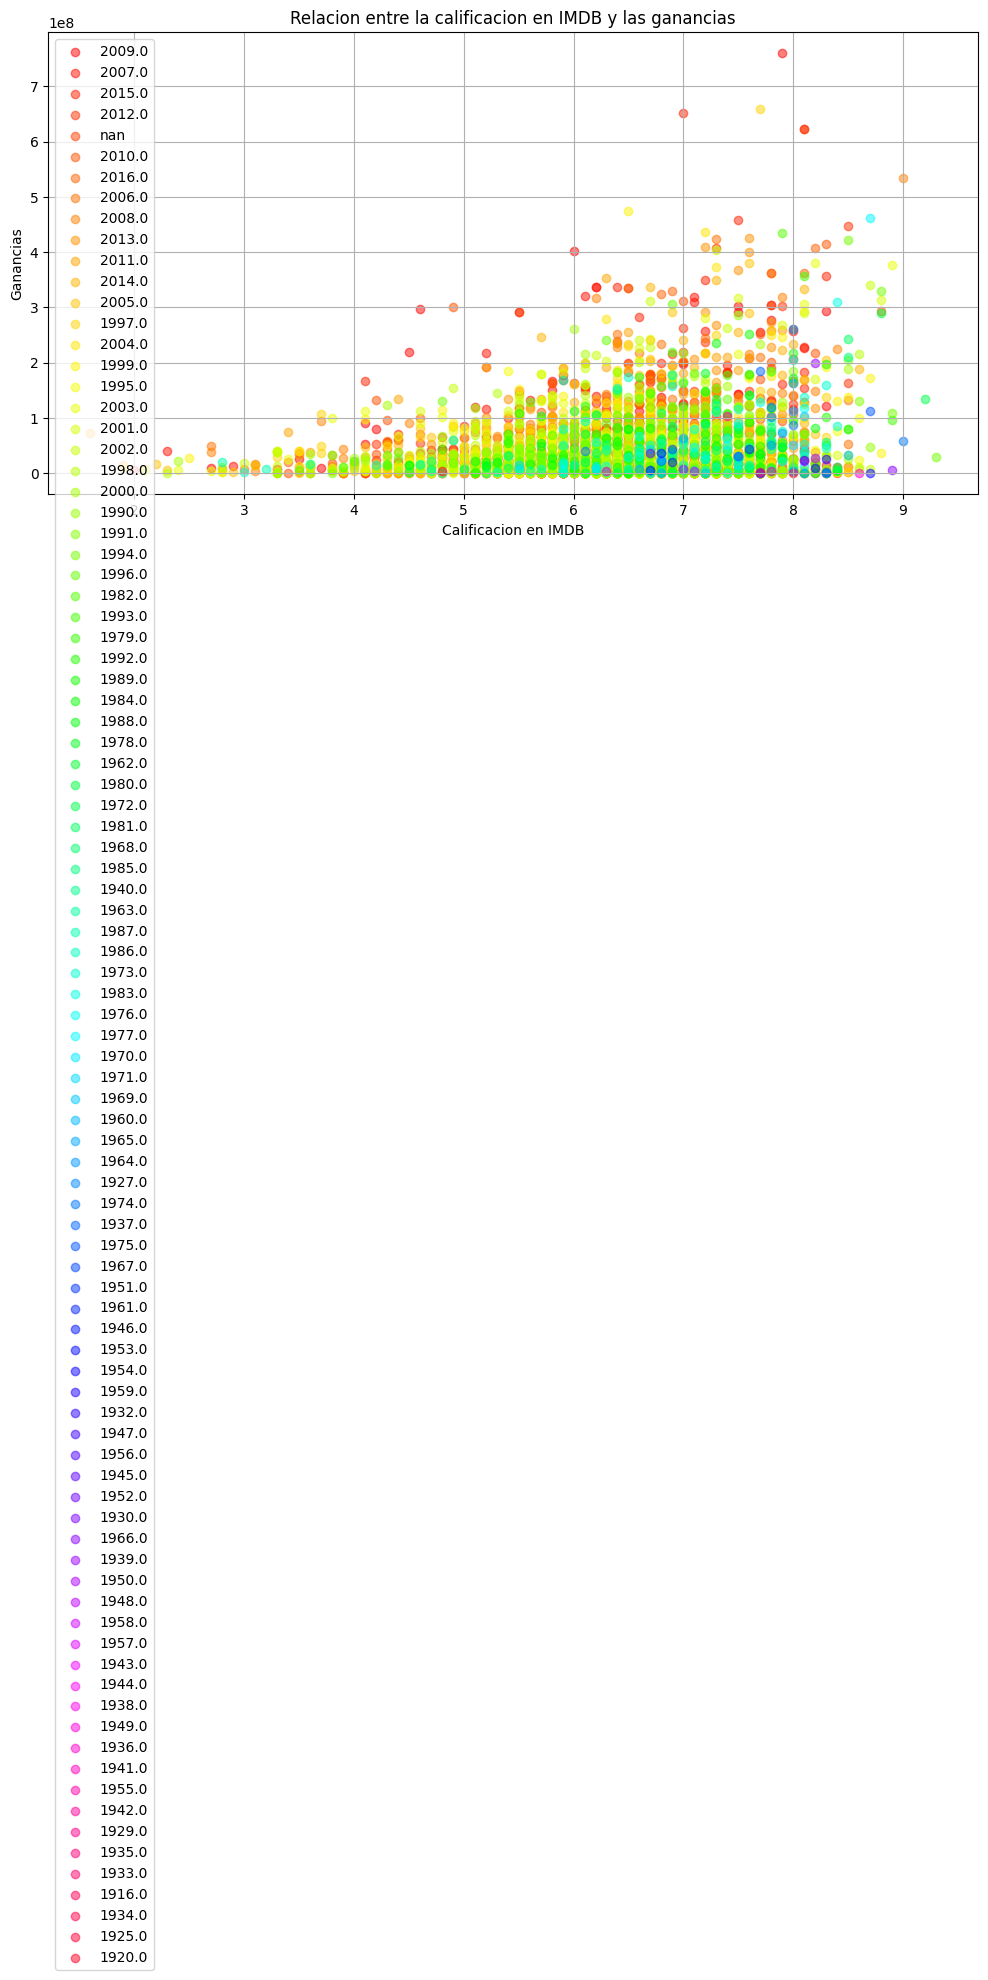

In [2]:
def get_cmap(n, name="hsv"):
    return plt.cm.get_cmap(name, n)

def data_dispersion(labelx, labely, df):
  years = df['title_year'].unique()
  cmap = get_cmap(len(years) + 1)
  plt.figure(figsize=(12, 6))
  for i, year in enumerate(years):
      subset = df[df['title_year'] == year]
      plt.scatter(subset[labelx], subset[labely], label=year, color=cmap(i), alpha=0.5)
  plt.legend()
  plt.title('Relacion entre la calificacion en IMDB y las ganancias')
  plt.xlabel('Calificacion en IMDB')
  plt.ylabel('Ganancias')
  plt.grid(True)
  plt.show()

data_dispersion('imdb_score', 'gross', data)

Los índices no coinciden. Ajustando...


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


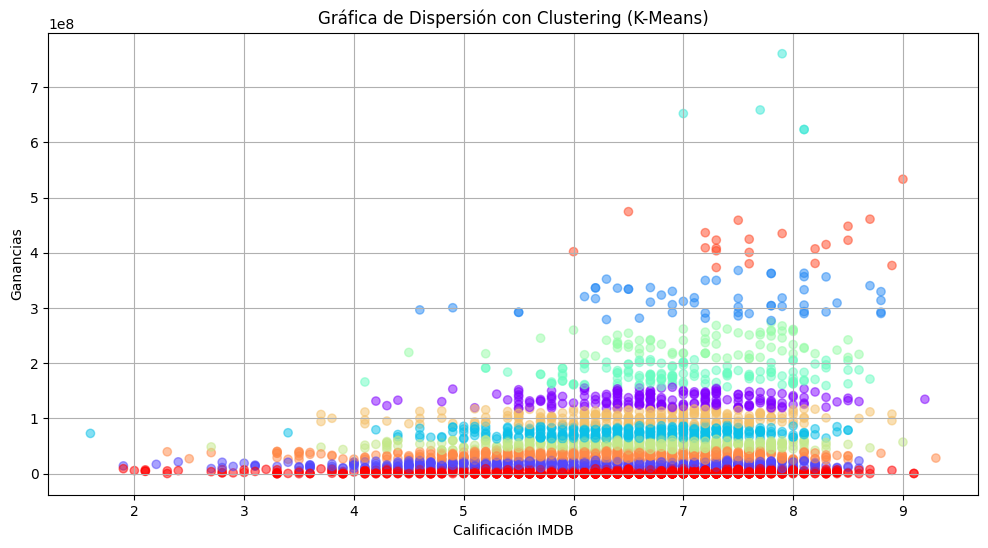

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecciona las columnas 'imdb_score' y 'gross' del DataFrame 'data'
X = data[['imdb_score', 'gross']]

# Elimina las filas que contienen valores faltantes (NaN) en X
X = X.dropna()

# Verifica si hay discrepancias en los índices y ajusta si es necesario
if not data.index.equals(X.index):
    print("Los índices no coinciden. Ajustando...")
    data = data.loc[X.index]

# Crea una instancia del modelo K-Means con 12 clusters y semilla aleatoria 42
kmeans = KMeans(n_clusters=12, random_state=42)

# Aplica el modelo a los datos
kmeans.fit(X)

# Añade una columna 'Cluster' al DataFrame 'data' que contiene las etiquetas de cluster asignadas por K-Means
data['Cluster'] = kmeans.labels_

# Crea una gráfica de dispersión con los puntos coloreados por cluster
plt.figure(figsize=(12, 6))
plt.scatter(data['imdb_score'], data['gross'], c=data['Cluster'], cmap='rainbow', alpha=0.5)
plt.title('Gráfica de Dispersión con Clustering (K-Means)')
plt.xlabel('Calificación IMDB')
plt.ylabel('Ganancias')
plt.grid(True)
plt.show()
